## <center style="color:red;">**BrainScan – Détection du Cancer Cérébral par CNN**</center>

Ce projet vise à développer un modèle de Deep Learning capable de classer les images IRM cérébrales afin de détecter le cancer du cerveau avec précision. Il combine CNN, TensorFlow/Keras et OpenCV pour offrir une solution rapide, fiable et utile à l’aide au diagnostic médical.

<br>

### <span style="color:green;">**Chargement et Prétraitement du Dataset :**</span>

#### <span style="color:blue;">**1. Importer les bibliothèques nécessaires :**</span>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import zipfile
import cv2

#### <span style="color:blue;">**2. Chargement des Images et Vérification des Extensions :**</span>

##### **2.1. Définir les chemins pour le fichier ZIP et le dossier de décompression :**

In [2]:
zip_path = "../data/zip/Data.zip"
unziped_path = "../data/unziped"

##### **2.2. Décompresser le ZIP si le fichier existe :**

``zipfile`` est un module intégré en Python qui permet de travailler avec des fichiers ZIP. Avec ce module, on peux créer, lire, écrire, ajouter ou extraire des fichiers compressés dans une archive ZIP directement depuis notre code Python, sans avoir besoin d’outils externes.

In [3]:
if os.path.exists(zip_path) :
    print(f"Décompression de {zip_path} vers {unziped_path} :")
    with zipfile.ZipFile(zip_path, 'r') as z :
        if os.path.exists(unziped_path) :
            z.extractall(unziped_path)
        else :
            print(f"{unziped_path} Non Trouvé !")
    print("Décompression Terminée.")
else :
    print(f"{zip_path} Non Trouvé !")

Décompression de ../data/zip/Data.zip vers ../data/unziped :
Décompression Terminée.


##### **2.3. Trouver toutes les classes (dossiers/sous-dossiers) :**

In [4]:

classes = []

for d in sorted(os.listdir(unziped_path)) :
    for sub_d in sorted(os.listdir(f"{unziped_path}/{d}")) :
        if os.path.isdir(os.path.join(unziped_path, d, sub_d)):
            classes.append(f"{d}/{sub_d}")

print("classes = ",classes)

classes =  ['Data/glioma', 'Data/meningioma', 'Data/notumor', 'Data/pituitary']


##### **2.4. Définir les extensions d'image autorisées :**

In [5]:
allowed_extensions = ['jpeg', 'jpg', 'bmp', 'png']

# Listes pour stocker les images et leurs labels
images = []
labels = []

##### **2.5. Parcourir chaque classe et charger les images et Supprimer les fichiers avec extensions non autorisées :**

``cv2`` est le module Python de la bibliothèque ``OpenCV`` (**Open Source Computer Vision Library**).

``OpenCV`` est une bibliothèque très utilisée pour le traitement d’images et la vision par ordinateur. Elle permet de faire toutes sortes de choses avec des images et des vidéos : lire, écrire, transformer, analyser, détecter des objets, etc.

In [6]:
for c in classes :
    
    dir_path = os.path.join(unziped_path, c)

    for img in os.listdir(dir_path) :
        img_path = os.path.join(dir_path, img)

         # Vérifier que c'est un fichier
        if os.path.isfile(img_path) :

            # Récupérer l'extension en minuscule
            img_extension = img.split('.')[1].lower()
            
            if img_extension in allowed_extensions :
                try :
                    # Lire l'image avec OpenCV
                    pic = cv2.imread(img_path)
                    if pic is not None :
                        images.append(pic)              # Ajouter l'image à la liste
                        lbl = str(c.split('/')[1])      # Extraire le label de la sous-classe
                        labels.append(lbl)              # Ajouter le label correspondant
                    else:
                        print(f"Impossible de lire l'image : {img_path}")
                except Exception as e :
                     # Gérer toute erreur de lecture et afficher un message
                    print(f"Erreur lors de la lecture de {img_path} : {e}")
            else :
                # Supprimer le fichier si l'extension n'est pas autorisée
                os.remove(img_path)

In [7]:
print(f"- {len(images)} Images.")
print(f"- {len(labels)} Labels.")

- 7023 Images.
- 7023 Labels.


#### <span style="color:blue;">**3. Exploration et Visualisation des Classes du Dataset :**</span>

##### **3.1. Identifier les classes (dossiers) présentes dans le dataset :**

In [8]:
labels_uniques = []

for c in labels:
    if c not in labels_uniques:
        labels_uniques.append(c)

print(labels_uniques)

['glioma', 'meningioma', 'notumor', 'pituitary']


##### **3.2. Compter le nombre d’images par classe :**

In [9]:
images_par_label = {}

for lbl in labels:
    if lbl in images_par_label:
        images_par_label[lbl] += 1
    else:
        images_par_label[lbl] = 1

for classe, nombre in images_par_label.items():
    print(f"- {classe} : {nombre} images")


- glioma : 1621 images
- meningioma : 1645 images
- notumor : 2000 images
- pituitary : 1757 images


##### **3.3. Visualiser quelques échantillons d’images de chaque classe :**

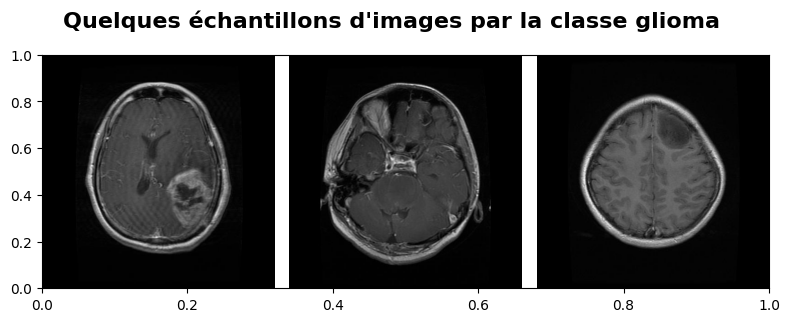

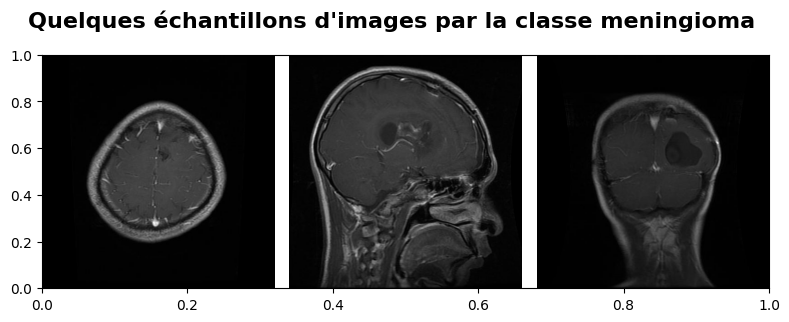

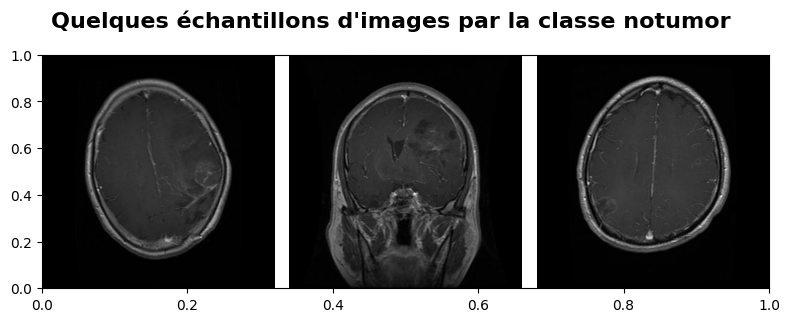

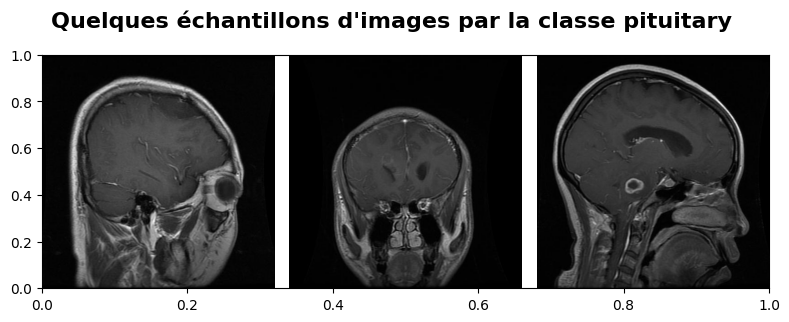

In [10]:
import random

labels_uniques = sorted(list(set(labels)))

indices = []

for indice, label in enumerate(labels_uniques) :
    
    plt.subplots(figsize=(8, 3))

    for idx, lbl in enumerate(labels) :
        if lbl == labels_uniques[0] :
            indices.append(idx)
        
    echantillon = random.sample(indices, 3)

    for i, j in enumerate(echantillon) :
        plt.subplot(1, 3, i+1)

        img_rgb = cv2.cvtColor(images[j], cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.axis("off")

    plt.suptitle(f"Quelques échantillons d'images par la classe {label} ", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    

##### **3.4. Générer un graphique montrant la distribution des classes :**

<function matplotlib.pyplot.show(close=None, block=None)>

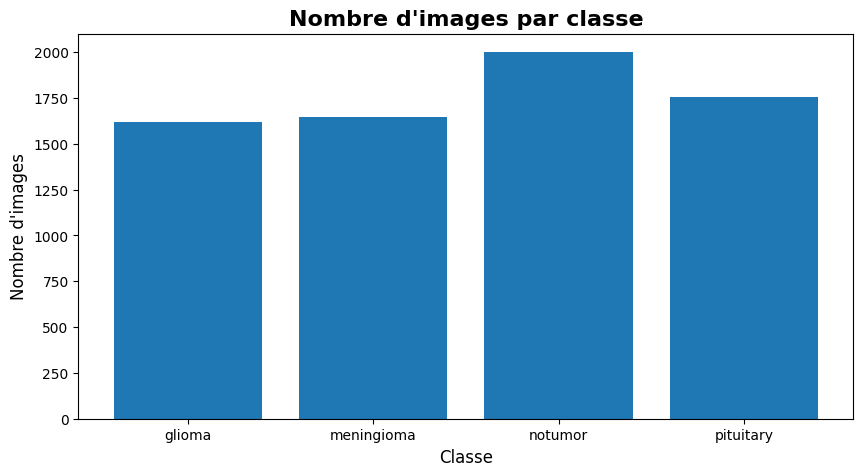

In [11]:
noms_labels = []
nb_images = []

for k, v in images_par_label.items() :
    noms_labels.append(k)
    nb_images.append(v)


plt.figure(figsize=(10,5))
plt.bar(noms_labels, nb_images)
plt.title("Nombre d'images par classe", fontsize=16, fontweight='bold')
plt.xlabel("Classe", fontsize=12)
plt.ylabel("Nombre d'images", fontsize=12)

plt.show

#### <span style="color:blue;">**4. Préparation des Données pour le Modèle CNN :**</span>

##### **4.1. Mélanger les images et les étiquettes dans deux listes synchronisées :**

``random.shuffle`` est une fonction du module random en Python qui permet de mélanger les éléments d’une liste de manière aléatoire.

In [12]:
if len(images) == len(labels) :
    indices = list(range(len(images)))
    
    random.shuffle(indices)

    images = [images[i] for i in indices]
    labels = [labels[i] for i in indices]

##### **4.2. Redimensionner les images (224×224) avec OpenCV :**

In [13]:
size = (224, 224)

resized_images = []

for img in images :
    try :
        if img is not None :
            resized = cv2.resize(img, size, interpolation=cv2.INTER_AREA)
            resized_images.append(resized)
        else :
            print("Image Vide !")
    except Exception as e :
        print(f"Erreur lors du redimensionnement de l'image : {e}")

##### **4.3. Convertir les listes en tableaux NumPy :**

En Python, un ``tableau NumPy`` (ou ``array NumPy``) est une structure de données fournie par la bibliothèque ``NumPy``, qui permet de stocker et manipuler efficacement des données numériques.

C’est comme une ``liste`` Python, mais beaucoup plus rapide et pratique pour le calcul scientifique et le traitement des données.

In [14]:
X = np.array(resized_images, dtype=np.float32) 

y = np.array(labels)

print("Conversion en tableaux NumPy réussie !")
print("Forme de X :", X.shape)
print("Type de X :", X.dtype)
print("Nombre de labels :", len(y))

Conversion en tableaux NumPy réussie !
Forme de X : (7023, 224, 224, 3)
Type de X : float32
Nombre de labels : 7023


##### **4.4. Appliquer un rééquilibrage si les classes sont déséquilibrées :**

La ``Data Augmentation`` (ou augmentation de données) est une technique utilisée en machine learning et deep learning pour augmenter la quantité et la diversité des données d’entraînement sans collecter de nouvelles données réelles.

C’est particulièrement **_utile pour les images_**, mais on peut aussi l’utiliser pour du texte ou des données audio.

- Les modèles, surtout les réseaux de neurones, ont besoin de beaucoup de données pour bien généraliser.

- Si on a peu de données, le modèle peut overfitter (s’adapter trop aux données d’entraînement et mal performer sur de nouvelles données).

- La Data Augmentation crée des variantes artificielles des données existantes, améliorant ainsi la robustesse du modèle.

**Techniques courantes pour les images :**

| Transformation                           | Description                                           |
| ---------------------------------------- | ----------------------------------------------------- |
| Rotation                             | Tourner l’image de quelques degrés                    |
| Translation                          | Déplacer l’image horizontalement ou verticalement     |
| Zoom                                 | Agrandir ou réduire l’image                           |
| Flip                                 | Retourner horizontalement ou verticalement            |
| Changement de luminosité / contraste | Modifier les couleurs ou la luminosité                |
| Bruit aléatoire                      | Ajouter un peu de bruit pour rendre le modèle robuste |
| Découpage (cropping)                 | Découper des parties de l’image                       |


In [15]:
import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

max_count = max(images_par_label.values())

augmented_images = []
augmented_labels = []

indices_cls=[]
images_cls=[]

for cls in labels_uniques:

    indices_cls = [i for i, lbl in enumerate(labels) if lbl == cls]
    images_cls = [resized_images[i] for i in indices_cls]

    nbr_to_generate = max_count - len(images_cls)

    
    if nbr_to_generate == 0:
        augmented_images.extend(images_cls)
        augmented_labels.extend([cls]*len(images_cls))
        continue

    augmented_images.extend(images_cls)
    augmented_labels.extend([cls]*len(images_cls))


    i = 0
    while nbr_to_generate > 0:
        img = images_cls[i % len(images_cls)]
        img_exp = np.expand_dims(img, 0) 
        for batch in datagen.flow(img_exp, batch_size=1):
            augmented_images.append(batch[0].astype(np.uint8))
            augmented_labels.append(cls)
            nbr_to_generate -= 1
            break 
        i += 1

images_balanced = np.array(augmented_images, dtype=np.float32)
labels_balanced = np.array(augmented_labels)

print("Après Augmentation :")
print("Nombre total d'images :", images_balanced.shape[0])

images = images_balanced
labels = labels_balanced

images_par_label = {}

for lbl in labels:
    if lbl in images_par_label:
        images_par_label[lbl] += 1
    else:
        images_par_label[lbl] = 1

for classe, nombre in images_par_label.items():
    print(f"- {classe} : {nombre} images")

Après Augmentation :
Nombre total d'images : 8000
- glioma : 2000 images
- meningioma : 2000 images
- notumor : 2000 images
- pituitary : 2000 images


<function matplotlib.pyplot.show(close=None, block=None)>

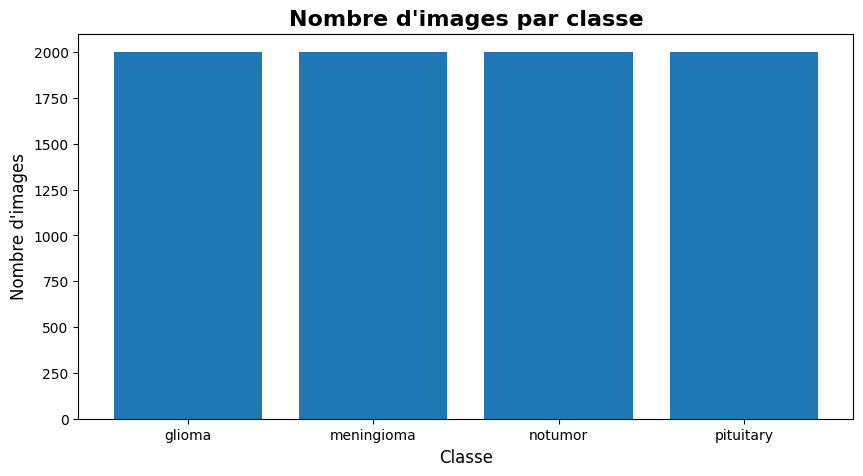

In [16]:
noms_labels = []
nb_images = []

for k, v in images_par_label.items() :
    noms_labels.append(k)
    nb_images.append(v)


plt.figure(figsize=(10,5))
plt.bar(noms_labels, nb_images)
plt.title("Nombre d'images par classe", fontsize=16, fontweight='bold')
plt.xlabel("Classe", fontsize=12)
plt.ylabel("Nombre d'images", fontsize=12)

plt.show

##### **4.5. Transformer les labels en format numérique (LabelEncoder et to_categorical) :**

En machine learning, LabelEncoder et to_categorical sont deux outils souvent utilisés pour préparer les labels (classes) des données pour un modèle, surtout en classification. Voici la différence et comment les utiliser :

- **LabelEncoder (de ``sklearn.preprocessing``) :**

    - Sert à convertir des labels catégoriels en nombres entiers.

    - Utile pour transformer des labels texte en valeurs numériques que le modèle peut comprendre.

- **to_categorical (de ``tensorflow.keras.utils``) :**

    - Sert à convertir des entiers en vecteurs one-hot.

    - Utile pour les réseaux de neurones, surtout avec ``categorical_crossentropy`` comme fonction de perte.

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

labels_categorical = tf.keras.utils.to_categorical(labels_encoded)

labels_categorical[:5]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

##### **4.6. Diviser le dataset en ensembles d’entraînement et de test :**

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    images_balanced,
    labels_categorical, 
    test_size=0.2,
    random_state=42,
    shuffle=True
)

##### **4.7. Normaliser les valeurs des pixels dans la plage [0, 1] :**

In [19]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [20]:
import joblib as jbl

variables = {
    "X_train" : X_train, 
    "y_train" : y_train, 
    "X_test" : X_test, 
    "y_test" : y_test,
    "images" : images_balanced,
    "labels" : labels_categorical,
    "encoder" : encoder,
    "labels_names" : labels_uniques
}

jbl.dump(variables, "../util/variables.pkl")

print("Success !")

Success !
